#### Coffee House analysis
Code file to analyze the coupons behavior for Cofeehosue coupons
For details about the data file refer to Module-5.ipynb

###### All coupon conclusions
Based on a general all analysis, some findings are:
1. % of surveyed that chose to accept the coupon:  56.84
2. Coupons issued breakdown: 31%: coffee house, 22%: cheap restaurants, 19%: carryout, 16%: bar, 12%: expensive restaurants
3. Acceptance rate among coupons issued is: 74%: carry-out, 70%: cheap restaurant, 50%: coffee house, 44%: expensive restaurant, 41%: bar
4. 1-day expiration coupons had a higher acceptance than 2hr expirations across all coupon categories except Bar coupons which was almost the same at ~40%

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
#adjust how many columns can be seen at a time in a list
pd.set_option('display.max_columns',26)

In [4]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [5]:
#no. of rows and columns in the dataset
data.shape

(12684, 26)

In [6]:
#what are the name of the columns
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [7]:
#what are the datatypes of the columns
data.dtypes

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

In [8]:
#how many null values exist in the rows
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

3. Decide what to do about your missing data -- drop, replace, other...

In [9]:
#change expected integer column age to be an integer after replacing 50plus with 51 and below 21 with 20
data["age"].unique()
data["age"].value_counts()
data["age"].replace("below21","20", inplace=True)
data["age"].replace("50plus","51", inplace=True)
data["age"] = data["age"].astype(int)
print(data["age"].dtype)

int64


In [10]:
#update data in the bar column to make all never , nan less than 1 all equal to 0
data["Bar"].replace("never","0", inplace=True)
data["Bar"].replace("less1","0", inplace=True)
data["Bar"].replace(np.nan,"0", inplace=True)
data["Bar"].replace("gt8","more than 8", inplace=True)
data["Bar"].unique()

array(['0', '1~3', 'more than 8', '4~8'], dtype=object)

In [11]:
#update data in the CoffeeHouse column to make all never , nan less than 1 all equal to 0
data["CoffeeHouse"].replace("never","0", inplace=True)
data["CoffeeHouse"].replace("less1","0", inplace=True)
data["CoffeeHouse"].replace(np.nan,"0", inplace=True)
data["CoffeeHouse"].replace("gt8","more than 8", inplace=True)
data["CoffeeHouse"].unique()

array(['0', '4~8', '1~3', 'more than 8'], dtype=object)

In [12]:
#update data in the CarryAway column to make all never , nan less than 1 all equal to 0
data["CarryAway"].replace("never","0", inplace=True)
data["CarryAway"].replace("less1","0", inplace=True)
data["CarryAway"].replace(np.nan,"0", inplace=True)
data["CarryAway"].replace("gt8","more than 8", inplace=True)
data["CarryAway"].unique()

array(['0', '4~8', '1~3', 'more than 8'], dtype=object)

In [13]:
#update data in the RestaurantLessThan20 column to make all never , nan less than 1 all equal to 0
data["RestaurantLessThan20"].replace("never","0", inplace=True)
data["RestaurantLessThan20"].replace("less1","0", inplace=True)
data["RestaurantLessThan20"].replace(np.nan,"0", inplace=True)
data["RestaurantLessThan20"].replace("gt8","more than 8", inplace=True)
data["RestaurantLessThan20"].unique()

array(['4~8', '1~3', '0', 'more than 8'], dtype=object)

In [14]:
#update data in the Restaurant20To50 column to make all never , nan less than 1 all equal to 0
data["Restaurant20To50"].replace("never","0", inplace=True)
data["Restaurant20To50"].replace("less1","0", inplace=True)
data["Restaurant20To50"].replace(np.nan,"0", inplace=True)
data["Restaurant20To50"].replace("gt8","more than 8", inplace=True)
data["Restaurant20To50"].unique()

array(['1~3', '0', 'more than 8', '4~8'], dtype=object)

In [15]:
#General functions
def draw_acceptdecline_barchart(xlabels,accept_rate,decline_rate,formatdict):
    x = np.arange(len(xlabels))  # the label locations
    width = 0.35  # the width of the bars
    
    
    fig, ax = plt.subplots()
    if formatdict.get('legend') is None:
        rects1 = ax.bar(x - width/2, accept_rate, width, label='Accepted')
        rects2 = ax.bar(x + width/2, decline_rate, width, label='Declined')
    else:
        rects1 = ax.bar(x - width/2, accept_rate, width, label=formatdict['legend'][0])
        rects2 = ax.bar(x + width/2, decline_rate, width, label=formatdict['legend'][1])
    ax.set_xticks(x)
    ax.set_xticklabels(xlabels)
    plt.legend()
    
    plt.title(formatdict["title"])
    plt.xlabel(formatdict["xlabel"])
    plt.ylabel(formatdict["ylabel"])
    plt.xticks(rotation=90)
    plt.savefig(formatdict["imgfilepath"])
    plt.show()
    return

def my_fmt(x):
    print(x)
    return '{:.4f}%\n({:.0f})'.format(x, total*x/100)

**Investigating the CoffeeHouse Coupons**


1. Create a new `DataFrame` that contains just the coffeehouse coupons.


In [16]:
coffee_df = data.query('coupon=="Coffee House"')
coffee_df.shape

(3996, 26)

In [17]:
#CoffeeHousecoupon-Analysis-2: what percentage of coupons where the bar coupons
total_coupon_count=data['coupon'].count()
coffee_coupon_count = coffee_df['coupon'].count()
print("% of Coffee House coupons issued = {0}/{1}={2:7.2f}".format(coffee_coupon_count,total_coupon_count,(coffee_coupon_count/total_coupon_count)*100))

% of Coffee House coupons issued = 3996/12684=  31.50


3. What proportion of bar coupons were accepted?


In [18]:
#CoffeeHousecoupons-Analysis#3: proportion of Coffee House coupons accepted is the ratio of accepted Coffee House coupons to the total Coffee House coupons issued
accepted_chcoupons = coffee_df.query('Y==1')["Y"].count()
total_chcoupons= coffee_df["Y"].count()
print("The overall acceptance rate of Coffee House coupons is ={0}/{1},{2:7.2f} %".format(accepted_chcoupons, total_chcoupons,(accepted_chcoupons/total_chcoupons)*100))

The overall acceptance rate of Coffee House coupons is =1995/3996,  49.92 %


4. Determine Coffee House coupon acceptance rate by various user demographics

In [49]:
#CoffeeHousecoupons-Analysis#4.11: Compare coffee house coupons accept/decline rate based on the age dimension
ar_coffee_age =coffee_df.groupby(["age","Y"])[["Y"]].count()
ar_coffee_age =ar_coffee_age.rename(columns={"Y":"count"})
all_coffee_age = coffee_df.groupby("age")[["Y"]].count()
#calculate rate based on total
ar_coffee_age["rate"]=round(ar_coffee_age["count"]/all_coffee_age["Y"]*100,2)
ar_coffee_age=ar_coffee_age.reset_index()
#replace 0 & 1 values with decline and accept
ar_coffee_age.loc[(ar_coffee_age["Y"]==0),"Y"]="decline"
ar_coffee_age.loc[(ar_coffee_age["Y"]==1),"Y"]="accept"
ar_coffee_age.sort_values(['Y','count'],ascending=False)
ar_coffee_age

,age,Y,count,rate
0,20,decline,47,30.32
1,20,accept,108,69.68
2,21,decline,420,47.57
3,21,accept,463,52.43
4,26,decline,409,48.52
5,26,accept,434,51.48
6,31,decline,326,52.33
7,31,accept,297,47.67
8,36,decline,214,53.23
9,36,accept,188,46.77


In [32]:
#CoffeeHousecoupons-Analysis#4.12: Pivot the DataFrame
ar_coffee_age_pivot = ar_coffee_age.pivot(index=['age'], columns='Y', values='rate').reset_index()

# Rename the columns
ar_coffee_age_pivot.columns.name = None
ar_coffee_age_pivot = ar_coffee_age_pivot.rename(columns={'decline': 'decline_rate', 'accept': 'accept_rate'})

ar_coffee_age_pivot = ar_coffee_age_pivot.sort_values('accept_rate',ascending=False) 
ar_coffee_age_pivot #display

,age,accept_rate,decline_rate
0,20,69.68,30.32
1,21,52.43,47.57
2,26,51.48,48.52
6,46,51.36,48.64
5,41,50.15,49.85
3,31,47.67,52.33
4,36,46.77,53.23
7,51,42.02,57.98


In [52]:
#CoffeeHousecoupons-Analysis#4.21: Compare coffee house coupons accept/decline rate based on the passanger dimension
ar_coffee_passanger =coffee_df.groupby(["passanger","Y"])[["Y"]].count()
ar_coffee_passanger =ar_coffee_passanger.rename(columns={"Y":"count"})
all_coffee_passanger = coffee_df.groupby("passanger")[["Y"]].count()
#calculate rate based on total
ar_coffee_passanger["rate"]=round(ar_coffee_passanger["count"]/all_coffee_passanger["Y"]*100,2)
ar_coffee_passanger=ar_coffee_passanger.reset_index()
#replace 0 & 1 values with decline and accept
ar_coffee_passanger.loc[(ar_coffee_passanger["Y"]==0),"Y"]="decline"
ar_coffee_passanger.loc[(ar_coffee_passanger["Y"]==1),"Y"]="accept"
ar_coffee_passanger.sort_values(['Y','count'],ascending=False)
ar_coffee_passanger

,passanger,Y,count,rate
0,Alone,decline,1268,56.21
1,Alone,accept,988,43.79
2,Friend(s),decline,495,40.31
3,Friend(s),accept,733,59.69
4,Kid(s),decline,107,51.69
5,Kid(s),accept,100,48.31
6,Partner,decline,131,42.95
7,Partner,accept,174,57.05


In [53]:
#CoffeeHousecoupons-Analysis#4.22: Pivot the DataFrame
ar_coffee_passanger_pivot = ar_coffee_passanger.pivot(index=['passanger'], columns='Y', values='rate').reset_index()

# Rename the columns
ar_coffee_passanger_pivot.columns.name = None
ar_coffee_passanger_pivot = ar_coffee_passanger_pivot.rename(columns={'decline': 'decline_rate', 'accept': 'accept_rate'})

ar_coffee_passanger_pivot = ar_coffee_passanger_pivot.sort_values('accept_rate',ascending=False) 
ar_coffee_passanger_pivot #display

,passanger,accept_rate,decline_rate
1,Friend(s),59.69,40.31
3,Partner,57.05,42.95
2,Kid(s),48.31,51.69
0,Alone,43.79,56.21


In [63]:
#CoffeeHousecoupons-Analysis#4.31: Compare coffee house coupons accept/decline rate based on the marital Status dimension
ar_coffee_maritalstatus =coffee_df.groupby(["maritalStatus","Y"])[["Y"]].count()
ar_coffee_maritalstatus =ar_coffee_maritalstatus.rename(columns={"Y":"count"})
all_coffee_maritalStatus = coffee_df.groupby("maritalStatus")[["Y"]].count()
#calculate rate based on total
ar_coffee_maritalstatus["rate"]=round(ar_coffee_maritalstatus["count"]/all_coffee_maritalStatus["Y"]*100,2)
ar_coffee_maritalstatus=ar_coffee_maritalstatus.reset_index()
#replace 0 & 1 values with decline and accept
ar_coffee_maritalstatus.loc[(ar_coffee_maritalstatus["Y"]==0),"Y"]="decline"
ar_coffee_maritalstatus.loc[(ar_coffee_maritalstatus["Y"]==1),"Y"]="accept"
ar_coffee_maritalstatus.sort_values(['Y','count'],ascending=False)
ar_coffee_maritalstatus

,maritalStatus,Y,count,rate
0,Divorced,decline,72,47.68
1,Divorced,accept,79,52.32
2,Married partner,decline,781,50.68
3,Married partner,accept,760,49.32
4,Single,decline,750,48.39
5,Single,accept,800,51.61
6,Unmarried partner,decline,374,52.16
7,Unmarried partner,accept,343,47.84
8,Widowed,decline,24,64.86
9,Widowed,accept,13,35.14


In [65]:
#CoffeeHousecoupons-Analysis#4.32: Pivot the DataFrame
ar_coffee_maritalstatus_pivot = ar_coffee_maritalstatus.pivot(index=['maritalStatus'], columns='Y', values='rate').reset_index()

# Rename the columns
ar_coffee_maritalstatus_pivot.columns.name = None
ar_coffee_maritalstatus_pivot = ar_coffee_maritalstatus_pivot.rename(columns={'decline': 'decline_rate', 'accept': 'accept_rate'})

ar_coffee_maritalstatus_pivot = ar_coffee_maritalstatus_pivot.sort_values('accept_rate',ascending=False) 
ar_coffee_maritalstatus_pivot #display

,maritalStatus,accept_rate,decline_rate
0,Divorced,52.32,47.68
2,Single,51.61,48.39
1,Married partner,49.32,50.68
3,Unmarried partner,47.84,52.16
4,Widowed,35.14,64.86


In [69]:
#CoffeeHousecoupons-Analysis#4.41: Compare coffee house coupons accept/decline rate based on the income dimension
ar_coffee_income =coffee_df.groupby(["income","Y"])[["Y"]].count()
ar_coffee_income =ar_coffee_income.rename(columns={"Y":"count"})
all_coffee_income = coffee_df.groupby("income")[["Y"]].count()
#calculate rate based on total
ar_coffee_income["rate"]=round(ar_coffee_income["count"]/all_coffee_income["Y"]*100,2)
ar_coffee_income=ar_coffee_income.reset_index()
#replace 0 & 1 values with decline and accept
ar_coffee_income.loc[(ar_coffee_income["Y"]==0),"Y"]="decline"
ar_coffee_income.loc[(ar_coffee_income["Y"]==1),"Y"]="accept"
ar_coffee_income.sort_values(['Y','count'],ascending=False)
ar_coffee_income

,income,Y,count,rate
0,$100000 or More,decline,270,50.56
1,$100000 or More,accept,264,49.44
2,$12500 - $24999,decline,273,45.96
3,$12500 - $24999,accept,321,54.04
4,$25000 - $37499,decline,337,52.66
5,$25000 - $37499,accept,303,47.34
6,$37500 - $49999,decline,270,45.76
7,$37500 - $49999,accept,320,54.24
8,$50000 - $62499,decline,272,49.64
9,$50000 - $62499,accept,276,50.36


In [71]:
#CoffeeHousecoupons-Analysis#4.42: Pivot the DataFrame
ar_coffee_income_pivot = ar_coffee_income.pivot(index=['income'], columns='Y', values='rate').reset_index()

# Rename the columns
ar_coffee_income_pivot.columns.name = None
ar_coffee_income_pivot = ar_coffee_income_pivot.rename(columns={'decline': 'decline_rate', 'accept': 'accept_rate'})

ar_coffee_income_pivot = ar_coffee_income_pivot.sort_values('accept_rate',ascending=False) 
ar_coffee_income_pivot #display

,income,accept_rate,decline_rate
7,$87500 - $99999,55.72,44.28
8,Less than $12500,55.19,44.81
3,$37500 - $49999,54.24,45.76
1,$12500 - $24999,54.04,45.96
4,$50000 - $62499,50.36,49.64
0,$100000 or More,49.44,50.56
2,$25000 - $37499,47.34,52.66
5,$62500 - $74999,43.64,56.36
6,$75000 - $87499,29.66,70.34


In [75]:
#CoffeeHousecoupons-Analysis#4.51: Compare coffee house coupons accept/decline rate based on the occupation dimension
ar_coffee_occupation =coffee_df.groupby(["occupation","Y"])[["Y"]].count()
ar_coffee_occupation =ar_coffee_occupation.rename(columns={"Y":"count"})
all_coffee_occupation = coffee_df.groupby("occupation")[["Y"]].count()
#calculate rate based on total
ar_coffee_occupation["rate"]=round(ar_coffee_occupation["count"]/all_coffee_occupation["Y"]*100,2)
ar_coffee_occupation=ar_coffee_occupation.reset_index()
#replace 0 & 1 values with decline and accept
ar_coffee_occupation.loc[(ar_coffee_occupation["Y"]==0),"Y"]="decline"
ar_coffee_occupation.loc[(ar_coffee_occupation["Y"]==1),"Y"]="accept"
ar_coffee_occupation.sort_values(['Y','count'],ascending=False)
ar_coffee_occupation

,occupation,Y,count,rate
0,Architecture & Engineering,decline,28,44.44
1,Architecture & Engineering,accept,35,55.56
2,Arts Design Entertainment Sports & Media,decline,103,49.28
3,Arts Design Entertainment Sports & Media,accept,106,50.72
4,Building & Grounds Cleaning & Maintenance,decline,3,27.27
5,Building & Grounds Cleaning & Maintenance,accept,8,72.73
6,Business & Financial,decline,76,52.05
7,Business & Financial,accept,70,47.95
8,Community & Social Services,decline,48,64.86
9,Community & Social Services,accept,26,35.14


In [76]:
#CoffeeHousecoupons-Analysis#4.52: Pivot the DataFrame
ar_coffee_occupation_pivot = ar_coffee_occupation.pivot(index=['occupation'], columns='Y', values='rate').reset_index()

# Rename the columns
ar_coffee_occupation_pivot.columns.name = None
ar_coffee_occupation_pivot = ar_coffee_occupation_pivot.rename(columns={'decline': 'decline_rate', 'accept': 'accept_rate'})

ar_coffee_occupation_pivot = ar_coffee_occupation_pivot.sort_values('accept_rate',ascending=False) 
ar_coffee_occupation_pivot #display

,occupation,accept_rate,decline_rate
10,Healthcare Practitioners & Technical,74.32,25.68
2,Building & Grounds Cleaning & Maintenance,72.73,27.27
22,Student,62.53,37.47
23,Transportation & Material Moving,61.84,38.16
11,Healthcare Support,61.54,38.46
12,Installation Maintenance & Repair,56.82,43.18
0,Architecture & Engineering,55.56,44.44
8,Farming Fishing & Forestry,54.55,45.45
24,Unemployed,54.21,45.79
1,Arts Design Entertainment Sports & Media,50.72,49.28


In [77]:
ar_coffee_occupation_pivot.describe()

,accept_rate,decline_rate
count,25.000000,25.000000
mean,50.326800,49.673200
std,10.448856,10.448856
min,35.140000,25.680000
25%,43.580000,44.440000
50%,47.950000,52.050000
75%,55.560000,56.420000
max,74.320000,64.860000


In [78]:
#CoffeeHousecoupons-Analysis#8.1: Generate a summary dataframe for the user demographic mean values 
coffeecoupondf = pd.DataFrame()
new_df=pd.DataFrame({"demographic":"Age",
                             "median":ar_coffee_age_pivot.describe().loc["mean","accept_rate"],
                            }, index=[0])
coffeecoupondf=pd.concat([coffeecoupondf,new_df], ignore_index=True) 

new_df=pd.DataFrame({"demographic":"Passenger",
                             "median":ar_coffee_passanger_pivot.describe().loc["mean","accept_rate"],
                            }, index=[1])

coffeecoupondf=pd.concat([coffeecoupondf,new_df], ignore_index=True) 

new_df=pd.DataFrame({"demographic":"maritalStatus",
                             "median":ar_coffee_maritalstatus_pivot.describe().loc["mean","accept_rate"],
                            }, index=[2])

coffeecoupondf=pd.concat([coffeecoupondf,new_df], ignore_index=True) 

new_df=pd.DataFrame({"demographic":"income",
                             "median":ar_coffee_income_pivot.describe().loc["mean","accept_rate"],
                            }, index=[3])

coffeecoupondf=pd.concat([coffeecoupondf,new_df], ignore_index=True) 

new_df=pd.DataFrame({"demographic":"occupation",
                             "median":ar_coffee_occupation_pivot.describe().loc["mean","accept_rate"],
                            }, index=[4])

coffeecoupondf=pd.concat([coffeecoupondf,new_df], ignore_index=True) 

coffeecoupondf

,demographic,median
0,Age,51.445000
1,Passenger,52.210000
2,maritalStatus,47.246000
3,income,48.847778
4,occupation,50.326800


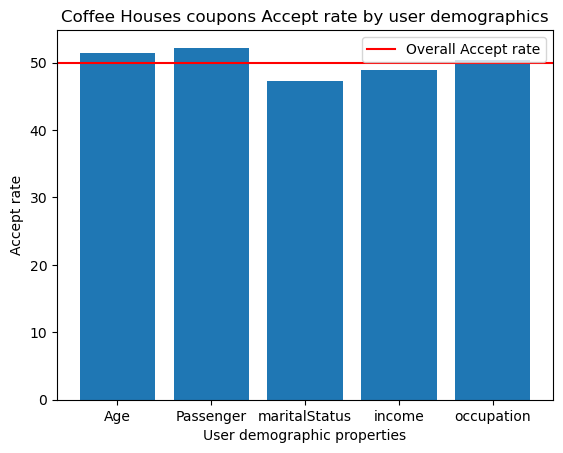

In [120]:
#CoffeeHousecoupons-Analysis#8.2: Visualize the dataframe
plt.bar(coffeecoupondf["demographic"],coffeecoupondf["median"])
Coffee_overall_acceptrate = 50
plt.axhline(Coffee_overall_acceptrate, color="red", label="Overall Accept rate")
plt.legend()
plt.title("Coffee Houses coupons Accept rate by user demographics")
plt.xlabel("User demographic properties")
plt.ylabel("Accept rate")
plt.savefig("images/coffeecoupon-barplot.png")
plt.show()

In [83]:
#CoffeeHousecoupons-Analysis#5.1: Compare coffee house coupons accept/decline rate based on user who has not visited a coffee house ev en once in a month
ar_coffee_freq =coffee_df.query("CoffeeHouse in ('0')").groupby(["CoffeeHouse","Y"])[["Y"]].count()
ar_coffee_freq =ar_coffee_freq.rename(columns={"Y":"count"})
all_coffee_freq = coffee_df.query("CoffeeHouse in ('0')").groupby("CoffeeHouse")[["Y"]].count()
#calculate rate based on total
ar_coffee_freq["rate"]=round(ar_coffee_freq["count"]/all_coffee_freq["Y"]*100,2)
ar_coffee_freq=ar_coffee_freq.reset_index()
#replace 0 & 1 values with decline and accept
ar_coffee_freq.loc[(ar_coffee_freq["Y"]==0),"Y"]="decline"
ar_coffee_freq.loc[(ar_coffee_freq["Y"]==1),"Y"]="accept"
ar_coffee_freq.sort_values(['Y','count'],ascending=False)
ar_coffee_freq

,CoffeeHouse,Y,count,rate
0,0,decline,1348,65.0
1,0,accept,726,35.0


In [90]:
#CoffeeHousecoupons-Analysis1. #Analysis-2: A total of 3996 Coffee House coupons were issued which is 32 % of the total coupons issued 
2. #Analysis#3: The acceptance rate of the Coffee House coupons is 50%
3. #Analysis#4: 
    1. Users over 50 had a low acceptance rate of 42%. 
    2. Users tend to accept these coupons more when they ride with friends (60%), a Partner (57%) or with kids (48%) in the vehicle  whereas accept rate is 44% when they ride alone
    3. Widowed users had a low acceptance rate of 35% 
    4. Users earning a salary between 63K - 87K had a lower acceptance rate of 37% compared to other income brackets which is 52%
4. #Analysis#5: Users who have visited a Coffee House at least once in a month have a high acceptance rate of 66% and users that had not been to a coffee house in a month have an acceptance rate of 35%
5. #Analysis#6: Analyzing the accepted coffee house coupons by time to destination and coupon expiration for coupons 
    1. Users accepted coupons to venues that were less than 25 miles
    2. Users preferred coupons that had a 1 day expiration  
6. #Analysis#6: Analyzing the accepted coffee house coupons by time to destination and coupon expiration for coupons 
    1. Users accepted coupons to venues that were less than 25 miles
    2. Users preferred coupons that had a 2h expiration than 1 day. These coupons were accepted more at 10 AM, 2PM , 6 PM and 7 AM.
7. #Analysis#8: Analyzing the acceptance rate of Coffee House coupons across user demographics such as - age, income, marital status, occupation and user behavior when passengers were in the vehicle shows that the acceptance rate is 47% (< 3% of overall acceptance rate) when viewed by maritalStatus and 52% (> 2% of overall acceptance rate) when viewed by which passengers were with them in the vehicle. Refer #CoffeeHousecoupons-Analysis#8.2 for visualization

Conclusions:
Coffee House coupons acceptance rate at 50% is below the overall acceptance rate of 57%. Users who drive with a passenger , is not widowed  and not over 50 years of age and have visited a Coffee House at least once in a month have a higher chance of accepting a Coffee House coupon. 
: Compare coffee house coupons accept/decline rate based on user visiting a Coffeehouse at least once / month
ar_coffee_freq =coffee_df.query("CoffeeHouse not in ('0')").groupby(["Y"])[["Y"]].count()
ar_coffee_freq =ar_coffee_freq.rename(columns={"Y":"count"})
all_coffee_freq = coffee_df.query("CoffeeHouse not in ('0')")[["Y"]].count()
#calculate rate based on total
ar_coffee_freq["rate"]=round(ar_coffee_freq["count"]/all_coffee_freq["Y"]*100,2)
ar_coffee_freq=ar_coffee_freq.reset_index()

#replace 0 & 1 values with decline and accept
ar_coffee_freq.loc[(ar_coffee_freq["Y"]==0),"Y"]="decline"
ar_coffee_freq.loc[(ar_coffee_freq["Y"]==1),"Y"]="accept"
ar_coffee_freq.sort_values(['Y','count'],ascending=False)
ar_coffee_freq

,Y,count,rate
0,decline,653,33.98
1,accept,1269,66.02


6. Determine how distance to venue drives users who accepted Coffee House coupons when the venue is in the same direction as their destination

In [98]:
#Coffeehousecoupons-Analysis#6.1:Determine number of Coffee House coupons issued to users driving in the same direction as their destination
data.query('coupon=="Coffee House" and direction_same==1').shape

(750, 26)

In [91]:
#Coffeehousecoupons-Analysis#6.2:Determine how distance to venue and time of day impacts users who accepted coffee house coupons when the venue is in the same direction as their destination
#filter dataset for those who accepted CH coupons and venue is in same direction as destination
coffeecoupons_accepted_indir = data.query('coupon=="Coffee House" and Y==1 and direction_same==1')[['destination','toCoupon_GEQ5min',
                                                                      'toCoupon_GEQ15min','toCoupon_GEQ25min','time',"Y"]]

coffeecoupons_accepted_indir.info()
#398 rows


<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 4009 to 12631
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   destination        398 non-null    object
 1   toCoupon_GEQ5min   398 non-null    int64 
 2   toCoupon_GEQ15min  398 non-null    int64 
 3   toCoupon_GEQ25min  398 non-null    int64 
 4   time               398 non-null    object
 5   Y                  398 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 21.8+ KB


In [93]:
#Coffeehousecoupons-Analysis#6.1: Group by GEQ5min
coffeecoupons_accepted_indir_ds1=coffeecoupons_accepted_indir.groupby(['destination','toCoupon_GEQ5min','time'])[['toCoupon_GEQ5min']].count()
coffeecoupons_accepted_indir_ds1=coffeecoupons_accepted_indir_ds1.rename(columns={'toCoupon_GEQ5min':'Cnt'}).reset_index()
coffeecoupons_accepted_indir_ds1=coffeecoupons_accepted_indir_ds1.rename(columns={'toCoupon_GEQ5min':'dist_to_venue'})
coffeecoupons_accepted_indir_ds1['dist_to_venue']=">=5"
coffeecoupons_accepted_indir_ds1

,destination,dist_to_venue,time,Cnt
0,Home,>=5,10PM,40
1,Home,>=5,6PM,114
2,Work,>=5,7AM,244


In [99]:
#Coffeehousecoupons-Analysis#6.2: Group by GEQ15min
coffeecoupons_accepted_indir_ds2 = coffeecoupons_accepted_indir.groupby(['destination','toCoupon_GEQ15min','time'])[['toCoupon_GEQ15min']].count()
coffeecoupons_accepted_indir_ds2=coffeecoupons_accepted_indir_ds2.rename(columns={'toCoupon_GEQ15min':'Cnt'}).reset_index()
coffeecoupons_accepted_indir_ds2=coffeecoupons_accepted_indir_ds2.rename(columns={'toCoupon_GEQ15min':'dist_to_venue'})
#create filters and update dist_to_venue
ds_filter = (coffeecoupons_accepted_indir_ds2['dist_to_venue'] == 0)
coffeecoupons_accepted_indir_ds2.loc[ds_filter,'dist_to_venue'] = "<15"
ds_filter = (coffeecoupons_accepted_indir_ds2['dist_to_venue'] == 1)
coffeecoupons_accepted_indir_ds2.loc[ds_filter,'dist_to_venue'] = ">=15"
coffeecoupons_accepted_indir_ds2

,destination,dist_to_venue,time,Cnt
0,Home,<15,10PM,40
1,Home,<15,6PM,99
2,Home,>=15,6PM,15
3,Work,<15,7AM,177
4,Work,>=15,7AM,67


In [100]:
#Coffeehousecoupons-Analysis#6.3: Group by GEQ25min
coffeecoupons_accepted_indir_ds3=coffeecoupons_accepted_indir.groupby(['destination','toCoupon_GEQ25min','time'])[['toCoupon_GEQ25min']].count()
coffeecoupons_accepted_indir_ds3=coffeecoupons_accepted_indir_ds3.rename(columns={'toCoupon_GEQ25min':'Cnt'}).reset_index()
coffeecoupons_accepted_indir_ds3=coffeecoupons_accepted_indir_ds3.rename(columns={'toCoupon_GEQ25min':'dist_to_venue'})
ds_filter = (coffeecoupons_accepted_indir_ds3['dist_to_venue'] == 0)
coffeecoupons_accepted_indir_ds3.loc[ds_filter,'dist_to_venue'] = "<25"
coffeecoupons_accepted_indir_ds3

,destination,dist_to_venue,time,Cnt
0,Home,<25,10PM,40
1,Home,<25,6PM,114
2,Work,<25,7AM,244


In [101]:
#Coffeehousecoupons-Analysis#6.4: concatenate all datasets generated for bar coupons accepted when travelling in direction of venue
coffeecoupon_indirdestdist_df = pd.DataFrame()
coffeecoupon_indirdestdist_df=pd.concat([coffeecoupon_indirdestdist_df,coffeecoupons_accepted_indir_ds1,coffeecoupons_accepted_indir_ds2,coffeecoupons_accepted_indir_ds3], ignore_index=True)
coffeecoupon_indirdestdist_df.sort_values('Cnt',ascending=False)

,destination,dist_to_venue,time,Cnt
2,Work,>=5,7AM,244
10,Work,<25,7AM,244
6,Work,<15,7AM,177
1,Home,>=5,6PM,114
9,Home,<25,6PM,114
4,Home,<15,6PM,99
7,Work,>=15,7AM,67
0,Home,>=5,10PM,40
3,Home,<15,10PM,40
8,Home,<25,10PM,40


In [102]:
#Coffeehousecoupons-Analysis#7: Determine expiration breakdown of  accepted coupons when users are travelling in the same direction of their destination
coffeecoupon_indirdestexpiration_df= data.query('Y ==1 and coupon == "Coffee House" and direction_same==1').groupby(['toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min','expiration'])[['Y']].count().groupby('expiration')[['Y']].sum()
coffeecoupon_indirdestexpiration_df.reset_index()

,expiration,Y
0,1d,251
1,2h,147


7. Determine how distance to venue drives users who accepted Coffee House coupons when the venue is in the opposite direction as their destination

In [103]:
#Coffeehousecoupons-Analysis#7.1:Determine how distance to venue and time of day impacts users who accepted bar coupons when the venue is in the same direction as their destination
#filter dataset for those who accepted bar coupons and venue is in the opposite direction as destination
coffeecoupons_accepted_oppdir = data.query('coupon=="Coffee House" and Y==1 and direction_opp==1')[['destination','toCoupon_GEQ5min',
                                                                     'toCoupon_GEQ15min','toCoupon_GEQ25min','expiration','time',"Y"]]
coffeecoupons_accepted_oppdir.shape

(1597, 7)

In [104]:
#CoffeeHousecoupons-Analysis#7.1: Group by GEQ5min
coffeecoupons_accepted_oppdir_ds1=coffeecoupons_accepted_oppdir.groupby(['destination','toCoupon_GEQ5min','time'])[['toCoupon_GEQ5min']].count()
coffeecoupons_accepted_oppdir_ds1=coffeecoupons_accepted_oppdir_ds1.rename(columns={'toCoupon_GEQ5min':'Cnt'}).reset_index()
coffeecoupons_accepted_oppdir_ds1=coffeecoupons_accepted_oppdir_ds1.rename(columns={'toCoupon_GEQ5min':'dist_to_venue'})
#create filters and update dist_to_venue
ds_filter = (coffeecoupons_accepted_oppdir_ds1['dist_to_venue'] == 0)
coffeecoupons_accepted_oppdir_ds1.loc[ds_filter,'dist_to_venue'] = "<5"
ds_filter = (coffeecoupons_accepted_oppdir_ds1['dist_to_venue'] == 1)
coffeecoupons_accepted_oppdir_ds1.loc[ds_filter,'dist_to_venue'] = ">=5"
coffeecoupons_accepted_oppdir_ds1


,destination,dist_to_venue,time,Cnt
0,Home,>=5,10PM,15
1,Home,>=5,6PM,167
2,No Urgent Place,>=5,10AM,576
3,No Urgent Place,>=5,10PM,71
4,No Urgent Place,>=5,2PM,435
5,No Urgent Place,>=5,6PM,170
6,Work,>=5,7AM,163


In [105]:
#Coffeehousecoupons-Analysis#7.2: Group by GEQ15min
coffeecoupons_accepted_oppdir_ds2 = coffeecoupons_accepted_oppdir.groupby(['destination','toCoupon_GEQ15min','time'])[['toCoupon_GEQ15min']].count()
coffeecoupons_accepted_oppdir_ds2=coffeecoupons_accepted_oppdir_ds2.rename(columns={'toCoupon_GEQ15min':'Cnt'}).reset_index()
coffeecoupons_accepted_oppdir_ds2=coffeecoupons_accepted_oppdir_ds2.rename(columns={'toCoupon_GEQ15min':'dist_to_venue'})
#create filters and update dist_to_venue
ds_filter = (coffeecoupons_accepted_oppdir_ds2['dist_to_venue'] == 0)
coffeecoupons_accepted_oppdir_ds2.loc[ds_filter,'dist_to_venue'] = "<15"
ds_filter = (coffeecoupons_accepted_oppdir_ds2['dist_to_venue'] == 1)
coffeecoupons_accepted_oppdir_ds2.loc[ds_filter,'dist_to_venue'] = ">=15"
coffeecoupons_accepted_oppdir_ds2

,destination,dist_to_venue,time,Cnt
0,Home,<15,6PM,105
1,Home,>=15,10PM,15
2,Home,>=15,6PM,62
3,No Urgent Place,<15,10AM,279
4,No Urgent Place,<15,10PM,10
5,No Urgent Place,<15,2PM,202
6,No Urgent Place,<15,6PM,142
7,No Urgent Place,>=15,10AM,297
8,No Urgent Place,>=15,10PM,61
9,No Urgent Place,>=15,2PM,233


In [106]:
#Coffeehousecoupons-Analysis#7.3: Group by GEQ25min
coffeecoupons_accepted_oppdir_ds3=coffeecoupons_accepted_oppdir.groupby(['destination','toCoupon_GEQ25min','time'])[['toCoupon_GEQ25min']].count()
coffeecoupons_accepted_oppdir_ds3=coffeecoupons_accepted_oppdir_ds3.rename(columns={'toCoupon_GEQ25min':'Cnt'}).reset_index()
coffeecoupons_accepted_oppdir_ds3=coffeecoupons_accepted_oppdir_ds3.rename(columns={'toCoupon_GEQ25min':'dist_to_venue'})
ds_filter = (coffeecoupons_accepted_oppdir_ds3['dist_to_venue'] == 0)
coffeecoupons_accepted_oppdir_ds3.loc[ds_filter,'dist_to_venue'] = "<25"
ds_filter = (coffeecoupons_accepted_oppdir_ds3['dist_to_venue'] == 1)
coffeecoupons_accepted_oppdir_ds3.loc[ds_filter,'dist_to_venue'] = ">=25"
coffeecoupons_accepted_oppdir_ds3

,destination,dist_to_venue,time,Cnt
0,Home,<25,10PM,15
1,Home,<25,6PM,144
2,Home,>=25,6PM,23
3,No Urgent Place,<25,10AM,576
4,No Urgent Place,<25,10PM,71
5,No Urgent Place,<25,2PM,435
6,No Urgent Place,<25,6PM,170
7,Work,<25,7AM,79
8,Work,>=25,7AM,84


In [107]:
#Coffeehousecoupons-Analysis#7.4: concatenate all datasets generated for bar coupons accepted when travelling opposite direction of venue
coffeecoupon_oppdirdestdist_df = pd.DataFrame()
coffeecoupon_oppdirdestdist_df=pd.concat([coffeecoupon_oppdirdestdist_df,coffeecoupons_accepted_oppdir_ds1,coffeecoupons_accepted_oppdir_ds2,coffeecoupons_accepted_oppdir_ds3], ignore_index=True)
coffeecoupon_oppdirdestdist_df.sort_values('Cnt',ascending=False)

,destination,dist_to_venue,time,Cnt
2,No Urgent Place,>=5,10AM,576
22,No Urgent Place,<25,10AM,576
4,No Urgent Place,>=5,2PM,435
24,No Urgent Place,<25,2PM,435
14,No Urgent Place,>=15,10AM,297
10,No Urgent Place,<15,10AM,279
16,No Urgent Place,>=15,2PM,233
12,No Urgent Place,<15,2PM,202
25,No Urgent Place,<25,6PM,170
5,No Urgent Place,>=5,6PM,170


In [108]:

#Coffeehousecoupons-Analysis#7.5: Determine expiration breakdown of  accepted coupons when users are travelling in the opposite direction of their destination
coffeecoupon_oppdirdestexpiration_df= coffeecoupons_accepted_oppdir.query('Y ==1 and coupon == "Coffee House" and direction_opp==1').groupby(['toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min','expiration'])[['Y']].count().groupby('expiration')[['Y']].sum()
coffeecoupon_oppdirdestexpiration_df.reset_index()

,expiration,Y
0,1d,782
1,2h,815


In [114]:


#Coffeehousecoupons-Analysis#7.6: Determine expiration breakdown of  accepted coupons when users are travelling in the opposite direction of their destination
coffeecoupon_oppdirdestexpiration_df= coffeecoupons_accepted_oppdir.query('expiration =="2h"').groupby(['time'])[['Y']].sum()
coffeecoupon_oppdirdestexpiration_df.reset_index()
coffeecoupon_oppdirdestexpiration_df.sort_values('Y',ascending=False)

,Y
time,
10AM,355
2PM,178
6PM,165
7AM,102
10PM,15


### Coffee House coupon analysis & conclusions
Based on the Coffee coupons analysis, some findings are:

###### Analysis:

1. #Analysis-2: A total of 3996 Coffee House coupons were issued which is 32 % of the total coupons issued 
2. #Analysis#3: The acceptance rate of the Coffee House coupons is 50%
3. #Analysis#4: 
    1. Users over 50 had a low acceptance rate of 42%. 
    2. Users tend to accept these coupons more when they ride with friends (60%), a Partner (57%) or with kids (48%) in the vehicle  whereas accept rate is 44% when they ride alone
    3. Widowed users had a low acceptance rate of 35% 
    4. Users earning a salary between 63K - 87K had a lower acceptance rate of 37% compared to other income brackets which is 52%
4. #Analysis#5: Users who have visited a Coffee House at least once in a month have a high acceptance rate of 66% and users that had not been to a coffee house in a month have an acceptance rate of 35%
5. #Analysis#6: Analyzing the accepted coffee house coupons by time to destination and coupon expiration for coupons 
    1. Users accepted coupons to venues that were less than 25 miles
    2. Users preferred coupons that had a 1 day expiration  
6. #Analysis#6: Analyzing the accepted coffee house coupons by time to destination and coupon expiration for coupons 
    1. Users accepted coupons to venues that were less than 25 miles
    2. Users preferred coupons that had a 2h expiration than 1 day. These coupons were accepted more at 10 AM, 2PM , 6 PM and 7 AM.
7. #Analysis#8: Analyzing the acceptance rate of Coffee House coupons across user demographics such as - age, income, marital status, occupation and user behavior when passengers were in the vehicle shows that the acceptance rate is 47% (< 3% of overall acceptance rate) when viewed by maritalStatus and 52% (> 2% of overall acceptance rate) when viewed by which passengers were with them in the vehicle. Refer #CoffeeHousecoupons-Analysis#8.2 for visualization


###### Conclusions:

Coffee House coupons acceptance rate at 50% is below the overall acceptance rate of 57%. Users who drive with a passenger , is not widowed  and not over 50 years of age and have visited a Coffee House at least once in a month have a higher chance of accepting a Coffee House coupon. 
